# Explore here

In [3]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
total_data.shape


(1338, 7)

In [5]:
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Factorize the Room Type and Neighbourhood Data
total_data["sex"] = pd.factorize(total_data["sex"])[0]
total_data["smoker"] = pd.factorize(total_data["smoker"])[0]
total_data["region"] = pd.factorize(total_data["region"])[0]

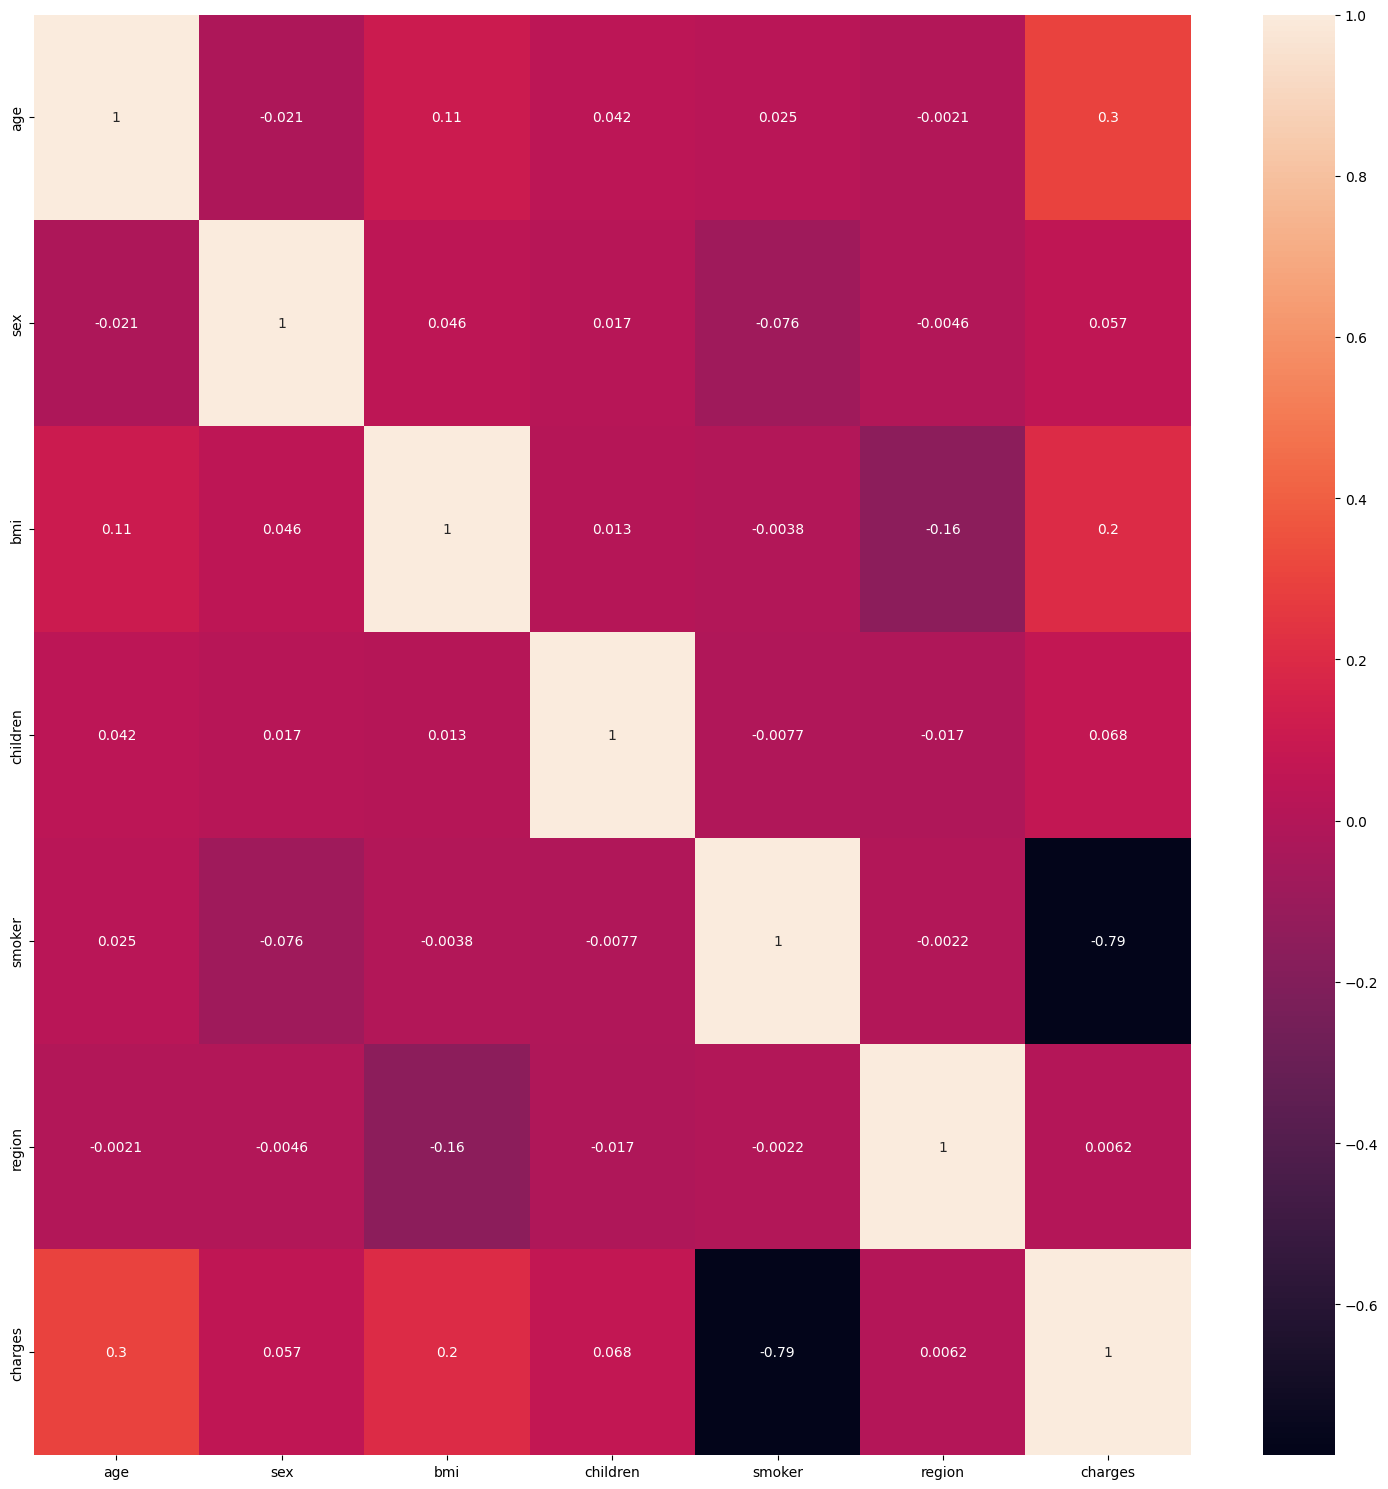

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["age", "sex", "bmi", "children", "smoker",	
                        "region", "charges"]].corr(), annot = True)

plt.tight_layout()

# Draw Plot
plt.show()

In [11]:
total_data.describe()


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [12]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [14]:
total_data.shape

(1337, 7)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = total_data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = total_data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)


In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 35493102.61165051
R-squared: 0.8068466322629112


In [19]:
results_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': y_pred})
print(results_df.head(10))

      Actual Charges  Predicted Charges
899       8688.85885        8080.450186
1063      5708.86700        5592.871120
1255     11436.73815       14378.298655
298      38746.35510       31731.819541
237       4463.20510        9158.356944
481       9304.70190       13361.014269
240      38511.62830       30257.655258
277       2150.46900        1308.647356
415       7345.72660       10849.425445
706      10264.44210       11375.548519


In [25]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate Mean Squared Error (MSE) for the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Make predictions on the testing set
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) for the testing set
mse_test = mean_squared_error(y_test, y_test_pred)

print("Mean Squared Error (MSE) on Training Set:", mse_train)
print("Mean Squared Error (MSE) on Testing Set:", mse_test)

Mean Squared Error (MSE) on Training Set: 37005531.72811554
Mean Squared Error (MSE) on Testing Set: 35493102.61165051
